In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.cross_validation import ShuffleSplit, train_test_split 
%matplotlib inline

# A first approach with the Random Forest Classifier

In [59]:
train_set = pd.read_csv('/Users/matyasamrouche/Downloads/train-set.csv')
test_set = pd.read_csv('/Users/matyasamrouche/Downloads/test-set.csv')

In [60]:
train_set = train_set.drop(columns='Id')
train_set.head(5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2611,326,20,120,27,1597,168,214,184,2913,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
1,2772,324,17,42,7,1814,175,220,183,2879,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2,2764,4,14,480,-21,700,201,212,148,700,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,3032,342,9,60,8,4050,202,227,164,2376,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
4,2488,23,11,117,21,1117,209,218,151,1136,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [61]:
# we need to see all the columns to check if there are some that are empties
pd.set_option('display.max_columns', None) 
train_set.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000
mean,2959.800552,155.629891,14.095043,269.731845,46.474718,2352.595141,212.153062,223.343970,142.555615,1979.363977,0.448795,0.051551,0.436255,0.063398,0.005179,0.012984,0.008303,0.021251,0.002784,0.011339,0.000193,0.000316,0.002056,0.055928,0.021386,0.051540,0.030048,0.001040,0.000002,0.004912,0.005871,0.003306,0.006871,0.016035,0.001445,0.057613,0.099474,0.037103,0.000825,0.004558,0.001903,0.001545,0.198273,0.051596,0.043859,0.090365,0.077678,0.002792,0.003276,0.000202,0.000471,0.026916,0.023646,0.015118,2.052294
std,280.351766,112.095470,7.501853,213.069124,58.433933,1563.557679,26.793767,19.813479,38.336178,1325.877589,0.497372,0.221119,0.495920,0.243678,0.071776,0.113206,0.090742,0.144221,0.052691,0.105878,0.013888,0.017770,0.045296,0.229782,0.144666,0.221096,0.170720,0.032236,0.001375,0.069912,0.076396,0.057404,0.082608,0.125610,0.037986,0.233010,0.299298,0.189014,0.028705,0.067360,0.043579,0.039279,0.398699,0.221211,0.204781,0.286705,0.267665,0.052762,0.057141,0.014224,0.021696,0.161838,0.151943,0.122021,1.396863
min,1759.000000,-72.000000,-3.000000,-144.000000,-182.000000,-805.000000,-2.000000,0.000000,-17.000000,-704.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,223.000000,30.000000,2001.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [49]:
# Initial Random Forest Model fitting with 300 estimators. 
 
random_forest_init = RandomForestClassifier(n_estimators=100, bootstrap=True, oob_score=True) 
random_forest_init.fit(train_set.iloc[:,:-1].values, train_set.iloc[:,-1:].values.ravel()) 
print ("Initial Random Forest train-set score: ", random_forest_init.score(train_set.iloc[:,:-1].values
                                                            , train_set.iloc[:,-1:].values.ravel())) 

Initial Random Forest train-set score:  0.9999981086397337


In [50]:
#Run Predictions on test_set
test_set['Cover_Type'] = random_forest_init.predict(test_set.drop(columns='Id').values)
submission_csv = test_set[['Id', 'Cover_Type']]
submission_csv.head(5)

,Id,Cover_Type
0,528721,2
1,528722,2
2,528723,1
3,528724,2
4,528725,1


In [51]:
submission_csv.to_csv('/Users/matyasamrouche/Desktop/Matyas_Amrouche/SD701/submission_1.csv'
                                      , header = True
                                      , index=False)

# Features Engineering & Data Visualisation

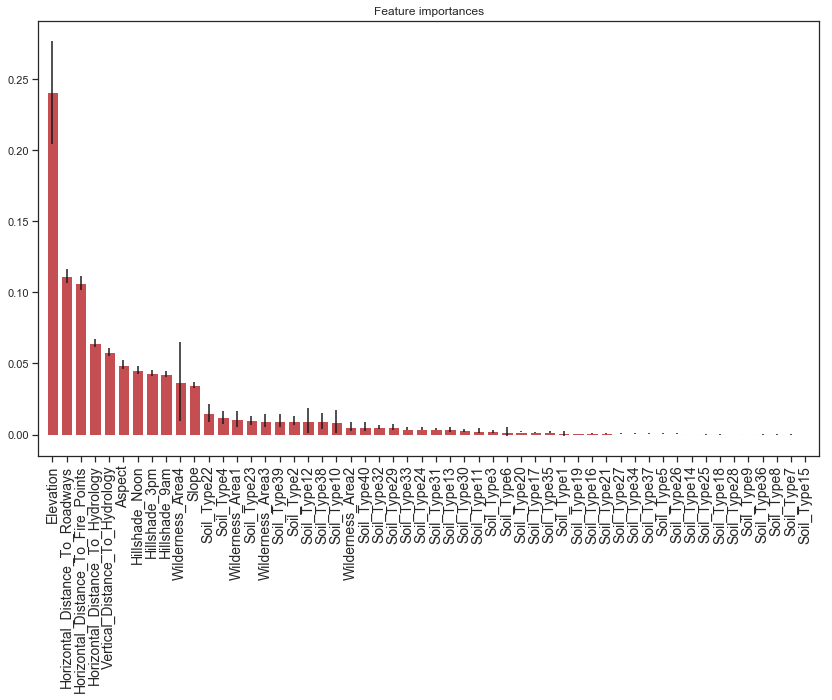

In [52]:
# The initial model give us the most important features it selected to create the random trees.
# Let's have a look a it.

importances = random_forest_init.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_forest_init.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
columns_names = train_set.iloc[:,:-1].columns.values[indices]


# Plot the feature importances of the forest
plt.figure(figsize=(14, 8))
plt.title("Feature importances")
plt.bar(range(train_set.iloc[:,:-1].shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(train_set.iloc[:,:-1].shape[1]), columns_names, fontsize=14, rotation=90)
plt.xlim([-1, train_set.iloc[:,:-1].shape[1]])
plt.show()

In [53]:
# Let's keep our 10 most important features and continuous data for a datavisualisation purpose
data_visualisation = train_set[columns_names[:10]]
data_visualisation['Cover_Type'] = train_set['Cover_Type']
data_visualisation.head(5)

/Users/matyasamrouche/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Elevation,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Aspect,Hillshade_Noon,Hillshade_3pm,Hillshade_9am,Wilderness_Area4,Cover_Type
0,2611,1597,2913,120,27,326,214,184,168,0,6
1,2772,1814,2879,42,7,324,220,183,175,0,2
2,2764,700,700,480,-21,4,212,148,201,0,2
3,3032,4050,2376,60,8,342,227,164,202,0,2
4,2488,1117,1136,117,21,23,218,151,209,1,2


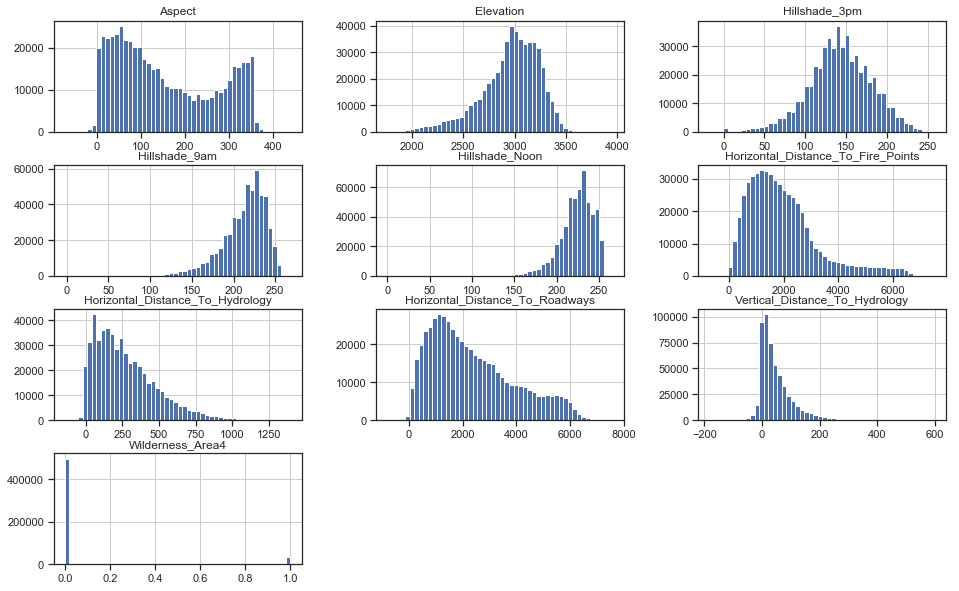

In [54]:
# 
data_visualisation.iloc[:,:10].hist(figsize=(16,10), bins=50, stacked=True) 
plt.show() 

We are able to see that we have some "0" values for Hillshade 3PM. 

Let's check if we can spot some abberations between our covariables and Hillshade 3PM.

In [55]:
# The code below is quite long to run, so we decided to show a screenshot of its output instead

# sns.set(style="ticks")
# sns.pairplot(data_visualisation, hue = "Cover_Type")
# plt.show()

Here we plot all the scatterplots between our features. 

![title](pairplot.png)

/Users/matyasamrouche/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/matyasamrouche/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


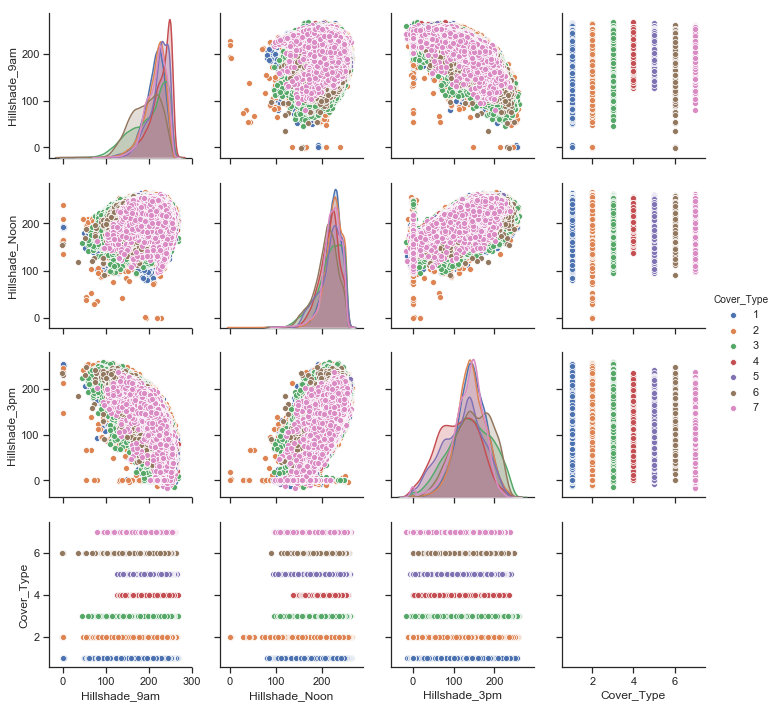

In [56]:
# Strange values (possibly error in measures) are seen 

missing_values_graph = train_set[['Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Cover_Type']]

sns.set(style="ticks")
sns.pairplot(missing_values_graph, hue = "Cover_Type")
plt.show()

Their are clearly Hillshade values that are missing, regarding the data distribution. 

## In order to keep accurate data, we are going to predict the "missing" Hillshade 3PM values with a linear model, the Gradient Boosting Regressor

In [62]:
#Make a copy and Reorder train.csv columns 
temp = train_set.copy() 
cols = temp.columns.tolist() 
cols = cols[:8]+cols[9:]+[cols[8]] 
temp = temp[cols] 

#Delete the Forest Cover Type column. We can't train on this since it doesn't exist in the test.csv file 
del temp['Cover_Type'] 
temp.head(5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Hillshade_3pm
0,2611,326,20,120,27,1597,168,214,2913,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,184
1,2772,324,17,42,7,1814,175,220,2879,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,183
2,2764,4,14,480,-21,700,201,212,700,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,148
3,3032,342,9,60,8,4050,202,227,2376,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,164
4,2488,23,11,117,21,1117,209,218,1136,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,151


In [63]:
# Split the train_set file into available values and missing values based on hillshade 3 PM. 
X, y, X_traincsv_missing, y_traincsv_missing = temp[temp.Hillshade_3pm!=0].values[:,:-1], \
                                            temp[temp.Hillshade_3pm!=0].values[:,-1:].ravel(), \
                                            temp[temp.Hillshade_3pm==0].values[:,:-1], \
                                            temp[temp.Hillshade_3pm==0].values[:,-1:].ravel() 

X_train, X_test, y_train, y_test = train_test_split(X, y) 

# Fit a Gradient Boosted Regression Tree model to the dataset with the Hillshade 3PM as category to predict
gbrt = GradientBoostingRegressor(n_estimators = 300) 
gbrt.fit(X_train,y_train) 


print ('Training R-squared value: %.2f' %gbrt.score(X_train, y_train))
print ('Test R-squared value: %.2f' %gbrt.score(X_test, y_test))

Training R-squared value: 0.99
Test R-squared value: 0.99


In [64]:
# Reload the test_set (that we modified during the 1st Random Forest)
test_set = pd.read_csv('/Users/matyasamrouche/Downloads/test-set.csv')
test_set.set_index("Id", inplace = True)
test_set.head(5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
528721,2953,224,9,55,11,1600,206,251,176,1669,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
528722,2977,233,14,42,1,1282,196,252,192,277,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
528723,3055,227,9,120,5,2724,207,249,178,908,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
528724,2615,107,13,277,74,967,241,224,110,3545,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
528725,3033,59,15,457,94,4086,233,213,99,4974,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [67]:
#Predict and fill missing values in train_set
temp.Hillshade_3pm.loc[temp.Hillshade_3pm==0] = gbrt.predict(X_traincsv_missing)
train_set.Hillshade_3pm = temp.Hillshade_3pm

#Make a copy and Reorder test.csv columns
temp = test_set.copy()
cols = temp.columns.tolist()
cols = cols[:8]+cols[9:]+[cols[8]]
temp = temp[cols]

#Extract missing rows from test.csv then predict and fill in the blanks.
X_testcsv_missing = temp[temp.Hillshade_3pm==0].values[:,:-1]
temp.Hillshade_3pm.loc[temp.Hillshade_3pm==0] = gbrt.predict(X_testcsv_missing)
test_set.Hillshade_3pm = temp.Hillshade_3pm


In [68]:
train_set.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000
mean,2959.800552,155.629891,14.095043,269.731845,46.474718,2352.595141,212.153062,223.343970,142.605234,1979.363977,0.448795,0.051551,0.436255,0.063398,0.005179,0.012984,0.008303,0.021251,0.002784,0.011339,0.000193,0.000316,0.002056,0.055928,0.021386,0.051540,0.030048,0.001040,0.000002,0.004912,0.005871,0.003306,0.006871,0.016035,0.001445,0.057613,0.099474,0.037103,0.000825,0.004558,0.001903,0.001545,0.198273,0.051596,0.043859,0.090365,0.077678,0.002792,0.003276,0.000202,0.000471,0.026916,0.023646,0.015118,2.052294
std,280.351766,112.095470,7.501853,213.069124,58.433933,1563.557679,26.793767,19.813479,38.197508,1325.877589,0.497372,0.221119,0.495920,0.243678,0.071776,0.113206,0.090742,0.144221,0.052691,0.105878,0.013888,0.017770,0.045296,0.229782,0.144666,0.221096,0.170720,0.032236,0.001375,0.069912,0.076396,0.057404,0.082608,0.125610,0.037986,0.233010,0.299298,0.189014,0.028705,0.067360,0.043579,0.039279,0.398699,0.221211,0.204781,0.286705,0.267665,0.052762,0.057141,0.014224,0.021696,0.161838,0.151943,0.122021,1.396863
min,1759.000000,-72.000000,-3.000000,-144.000000,-182.000000,-805.000000,-2.000000,0.000000,-17.000000,-704.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,223.000000,30.000000,2001.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

#### Let's see if we have filled the missing values of Hillshade 3PM

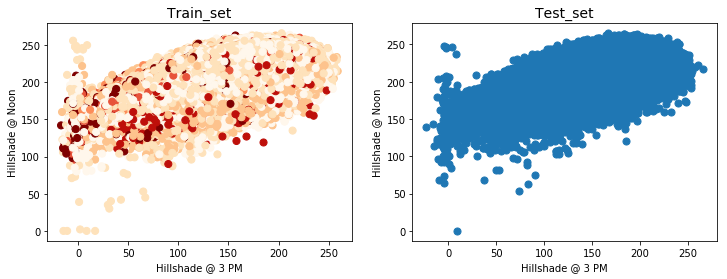

In [69]:
fig, ax=plt.subplots(1,2,figsize=(12,4)) 
ax[0].scatter(train_set.Hillshade_3pm, train_set.Hillshade_Noon, c=train_set.Cover_Type, s=50, cmap=plt.cm.OrRd)
ax[0].set_xlabel('Hillshade @ 3 PM')
ax[0].set_ylabel('Hillshade @ Noon')
ax[0].set_title('Train_set', fontsize=14)
ax[1].scatter(test_set.Hillshade_3pm, test_set.Hillshade_Noon, s=50, cmap=plt.cm.PuBu)
ax[1].set_xlabel('Hillshade @ 3 PM')
ax[1].set_ylabel('Hillshade @ Noon')
ax[1].set_title('Test_set', fontsize=14)
plt.show()


#### Now we can see that most of the aberrant values around 0 are better distributed

## Features Engineering

In this stage, we are going to create new features that may help our classifiers to improve his accuracy :

- Linear combination: The sum and difference between two pair of attributes. The following pairs of
measures are considered, generating, therefore, 2x4 = 8 new attributes: (Elevation, Vertical distance to
Hydrology), (Horizontal distance to Hydrology, Horizontal distance to Fire Points), (Horizontal distance
to Hydrology, Horizontal distance to Roadways) and (Horizontal distance to Fire Points, Horizontal
distance to Roadways).
- Euclidean distance: The euclidean distance applied to attributes Horizontal distance to Hydrology
and Vertical distance to Hydrology, generating 1 new attribute.

In [70]:
# Euclidian distance to the water
train_set['Hydro_dist'] = np.sqrt(train_set.Vertical_Distance_To_Hydrology**2 \
                                  + train_set.Horizontal_Distance_To_Hydrology**2) 

test_set['Hydro_dist'] = np.sqrt(test_set.Vertical_Distance_To_Hydrology**2 \
                                  + test_set.Horizontal_Distance_To_Hydrology**2) 

In [71]:
#Elevation adjusted by Horizontal distance to Hyrdrology
train_set['Diff_Elev_HD_Hyd'] = train_set.Elevation - train_set.Horizontal_Distance_To_Hydrology
test_set['Diff_Elev_HD_Hyd'] = test_set.Elevation - test_set.Horizontal_Distance_To_Hydrology

train_set['Sum_Elev_HD_Hyd'] = train_set.Elevation + train_set.Horizontal_Distance_To_Hydrology
test_set['Sum_Elev_HD_Hyd'] = test_set.Elevation + test_set.Horizontal_Distance_To_Hydrology


#Elevation adjusted by Vertical distance to Hyrdrology
train_set['Diff_Elev_VD_Hyd'] = train_set.Elevation - train_set.Vertical_Distance_To_Hydrology
test_set['Diff_Elev_VD_Hyd'] = test_set.Elevation - test_set.Vertical_Distance_To_Hydrology

train_set['Sum_Elev_VD_Hyd'] = train_set.Elevation + train_set.Vertical_Distance_To_Hydrology
test_set['Sum_Elev_VD_Hyd'] = test_set.Elevation + test_set.Vertical_Distance_To_Hydrology


#Horizontal distance Hydro adjusted by Horizontal distance to Fire Points
train_set['Diff_HD_Hyd_Fire'] = train_set.Horizontal_Distance_To_Hydrology - train_set.Horizontal_Distance_To_Fire_Points
test_set['Diff_HD_Hyd_Fire'] = test_set.Horizontal_Distance_To_Hydrology - test_set.Horizontal_Distance_To_Fire_Points

train_set['Sum_HD_Hyd_Fire'] = train_set.Horizontal_Distance_To_Hydrology + train_set.Horizontal_Distance_To_Fire_Points
test_set['Sum_HD_Hyd_Fire'] = test_set.Horizontal_Distance_To_Hydrology + test_set.Horizontal_Distance_To_Fire_Points


#Horizontal distance Hydro adjusted by Horizontal distance to Roadways
train_set['Diff_HD_Hyd_Road'] = train_set.Horizontal_Distance_To_Hydrology - train_set.Horizontal_Distance_To_Roadways
test_set['Diff_HD_Hyd_Road'] = test_set.Horizontal_Distance_To_Hydrology - test_set.Horizontal_Distance_To_Roadways

train_set['Sum_HD_Hyd_Road'] = train_set.Horizontal_Distance_To_Hydrology + train_set.Horizontal_Distance_To_Roadways
test_set['Sum_HD_Hyd_Road'] = test_set.Horizontal_Distance_To_Hydrology + test_set.Horizontal_Distance_To_Roadways


#Horizontal distance Fire adjusted by Horizontal distance to Roadways
train_set['Diff_HD_Fire_Road'] = train_set.Horizontal_Distance_To_Fire_Points - train_set.Horizontal_Distance_To_Roadways
test_set['Diff_HD_Fire_Road'] = test_set.Horizontal_Distance_To_Fire_Points - test_set.Horizontal_Distance_To_Roadways

train_set['Sum_HD_Fire_Road'] = train_set.Horizontal_Distance_To_Fire_Points + train_set.Horizontal_Distance_To_Roadways
test_set['Sum_HD_Fire_Road'] = test_set.Horizontal_Distance_To_Fire_Points + test_set.Horizontal_Distance_To_Roadways



In [72]:
train_set.head(5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Hydro_dist,Diff_Elev_HD_Hyd,Sum_Elev_HD_Hyd,Diff_Elev_VD_Hyd,Sum_Elev_VD_Hyd,Diff_HD_Hyd_Fire,Sum_HD_Hyd_Fire,Diff_HD_Hyd_Road,Sum_HD_Hyd_Road,Diff_HD_Fire_Road,Sum_HD_Fire_Road
0,2611,326,20,120,27,1597,168,214,184.0,2913,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,123.000000,2491,2731,2584,2638,-2793,3033,-1477,1717,1316,4510
1,2772,324,17,42,7,1814,175,220,183.0,2879,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,42.579338,2730,2814,2765,2779,-2837,2921,-1772,1856,1065,4693
2,2764,4,14,480,-21,700,201,212,148.0,700,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,480.459155,2284,3244,2785,2743,-220,1180,-220,1180,0,1400
3,3032,342,9,60,8,4050,202,227,164.0,2376,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,60.530984,2972,3092,3024,3040,-2316,2436,-3990,4110,-1674,6426
4,2488,23,11,117,21,1117,209,218,151.0,1136,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,118.869677,2371,2605,2467,2509,-1019,1253,-1000,1234,19,2253


 ### Random Forest

In [108]:
# Random Forest Model fitting with 300 estimators on the new features

X_train = train_set.loc[:, train_set.columns != 'Cover_Type']
y_train = train_set['Cover_Type']
random_forest_init = RandomForestClassifier(n_estimators=550, bootstrap=True, oob_score=True) 
random_forest_init.fit(X_train, y_train) 
#print ("Initial Random Forest train-set score: ", random_forest_init.score(X_train, y_train)) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=550, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [109]:
random_forest_init

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=550, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [111]:
#test_set = test_set.drop(columns= 'Cover_Type')
#test_set.set_index("Id", inplace = True)
test_set.head(5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Hydro_dist,Diff_Elev_HD_Hyd,Sum_Elev_HD_Hyd,Diff_Elev_VD_Hyd,Sum_Elev_VD_Hyd,Diff_HD_Hyd_Fire,Sum_HD_Hyd_Fire,Diff_HD_Hyd_Road,Sum_HD_Hyd_Road,Diff_HD_Fire_Road,Sum_HD_Fire_Road
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
528721,2953,224,9,55,11,1600,206,251,176.0,1669,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,56.089215,2898,3008,2942,2964,-1614,1724,-1545,1655,69,3269
528722,2977,233,14,42,1,1282,196,252,192.0,277,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42.011903,2935,3019,2976,2978,-235,319,-1240,1324,-1005,1559
528723,3055,227,9,120,5,2724,207,249,178.0,908,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,120.104121,2935,3175,3050,3060,-788,1028,-2604,2844,-1816,3632
528724,2615,107,13,277,74,967,241,224,110.0,3545,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,286.714143,2338,2892,2541,2689,-3268,3822,-690,1244,2578,4512
528725,3033,59,15,457,94,4086,233,213,99.0,4974,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,466.567251,2576,3490,2939,3127,-4517,5431,-3629,4543,888,9060


In [113]:
#Run Predictions on test_set
#test_set['Cover_Type'] = random_forest_init.predict(test_set)
#test_set.reset_index(inplace=True)
#test_set.head(5)
submission_csv = test_set[['Id', 'Cover_Type']]
submission_csv.head(5)

,Id,Cover_Type
0,528721,2
1,528722,2
2,528723,1
3,528724,2
4,528725,1


In [114]:
submission_csv.to_csv('/Users/matyasamrouche/Desktop/Matyas_Amrouche/SD701/submission_features_tuning.csv'
                                      , header = True
                                      , index=False)

### Extra Tree Classifier

In [102]:
from sklearn.ensemble import ExtraTreesClassifier


extra_Tree = ExtraTreesClassifier(n_estimators=450) 
extra_Tree.fit(X_train, y_train)
#print ("Extra Tree train-set score: ", extra_Tree.score(X_train, y_train)) 

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=450, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [34]:
#print ("Extra Tree train-set score: ", extra_Tree.score()) 

Initial Random Forest train-set score:  1.0


In [105]:
#test_set = test_set.drop(columns='Cover_Type')
#test_set.set_index("Id", inplace = True)
test_set.reset_index(inplace = True)
test_set.head(5)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Hydro_dist,Diff_Elev_HD_Hyd,Sum_Elev_HD_Hyd,Diff_Elev_VD_Hyd,Sum_Elev_VD_Hyd,Diff_HD_Hyd_Fire,Sum_HD_Hyd_Fire,Diff_HD_Hyd_Road,Sum_HD_Hyd_Road,Diff_HD_Fire_Road,Sum_HD_Fire_Road,Cover_Type
0,528721,2953,224,9,55,11,1600,206,251,176.0,1669,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,56.089215,2898,3008,2942,2964,-1614,1724,-1545,1655,69,3269,2
1,528722,2977,233,14,42,1,1282,196,252,192.0,277,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42.011903,2935,3019,2976,2978,-235,319,-1240,1324,-1005,1559,2
2,528723,3055,227,9,120,5,2724,207,249,178.0,908,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,120.104121,2935,3175,3050,3060,-788,1028,-2604,2844,-1816,3632,1
3,528724,2615,107,13,277,74,967,241,224,110.0,3545,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,286.714143,2338,2892,2541,2689,-3268,3822,-690,1244,2578,4512,2
4,528725,3033,59,15,457,94,4086,233,213,99.0,4974,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,466.567251,2576,3490,2939,3127,-4517,5431,-3629,4543,888,9060,1


In [106]:
#Run Predictions on test_set
#test_set['Cover_Type'] = random_forest_init.predict(test_set)
submission_csv = test_set[['Id', 'Cover_Type']]
submission_csv.head(5)

,Id,Cover_Type
0,528721,2
1,528722,2
2,528723,1
3,528724,2
4,528725,1


In [107]:
submission_csv.to_csv('/Users/matyasamrouche/Desktop/Matyas_Amrouche/SD701/submission_extra_tree.csv'
                                      , header = True
                                      , index=False)